In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.funcs as funcs
import mlgrad.utils as utils
import mlgrad.pca as pca
import mlgrad.plots as plots
import pandas as pd
import sklearn.datasets as datasets

In [2]:
X, Y = datasets.load_iris(return_X_y=True)
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [3]:
X0 = X
Y0 = Y

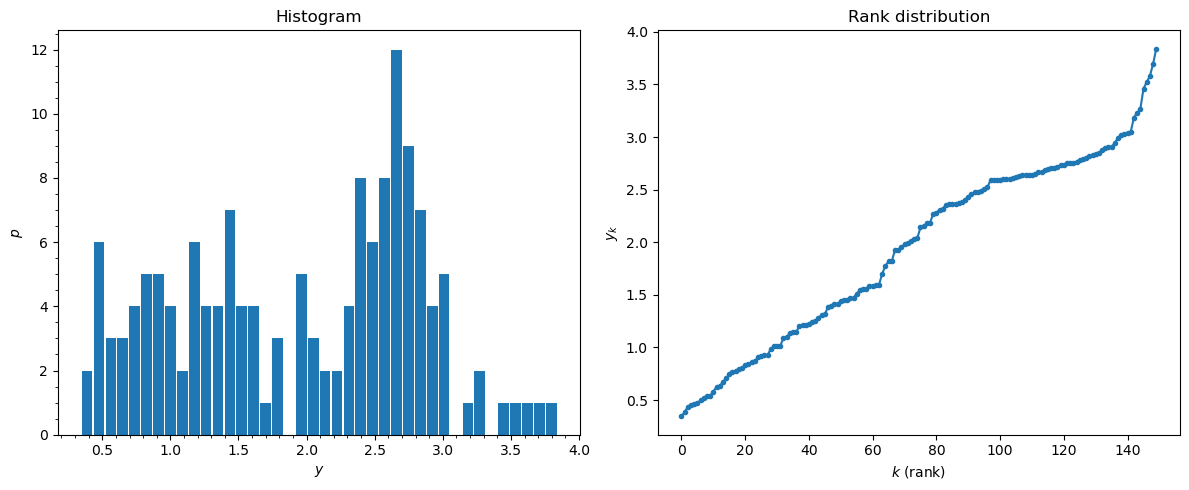

[5.843 3.057 3.758 1.199]


In [4]:
c = pca.location(X0)
Ds_c = pca.distance_center(X0, c)
plots.plot_hist_and_rank_distribution(Ds_c)
print(c)

In [5]:
X1 = X0 - c

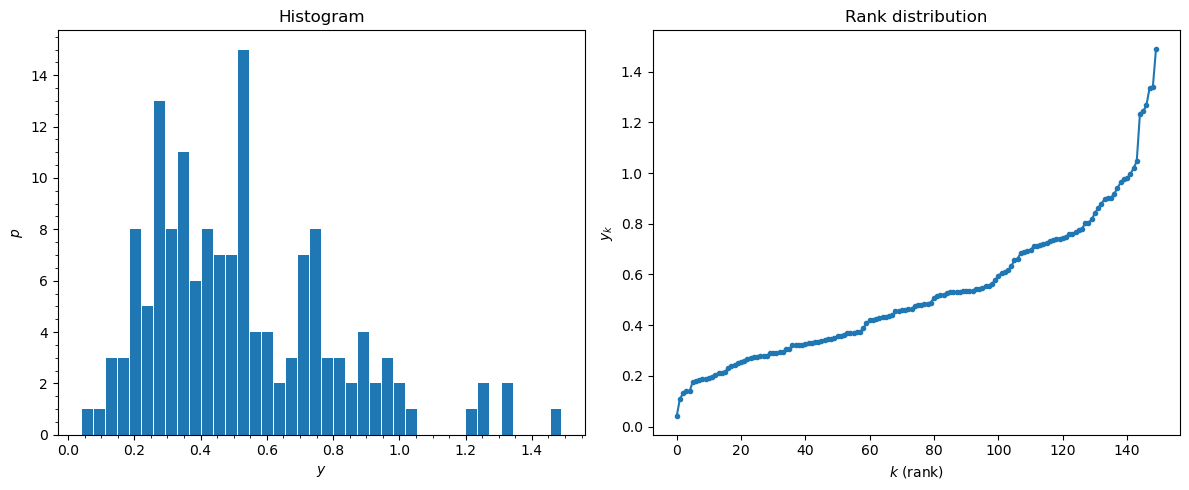

306.76221564126934 [ 0.395 -0.045  0.845  0.358]


In [6]:
a1, L1 = pca.find_pc(X1)
U1 = pca.project_line(X1, a1)
Ds_a1 = pca.distance_line(X1, a1)
plots.plot_hist_and_rank_distribution(Ds_a1)
print(L1, a1)

In [7]:
X2 = pca.project(X1, a1)

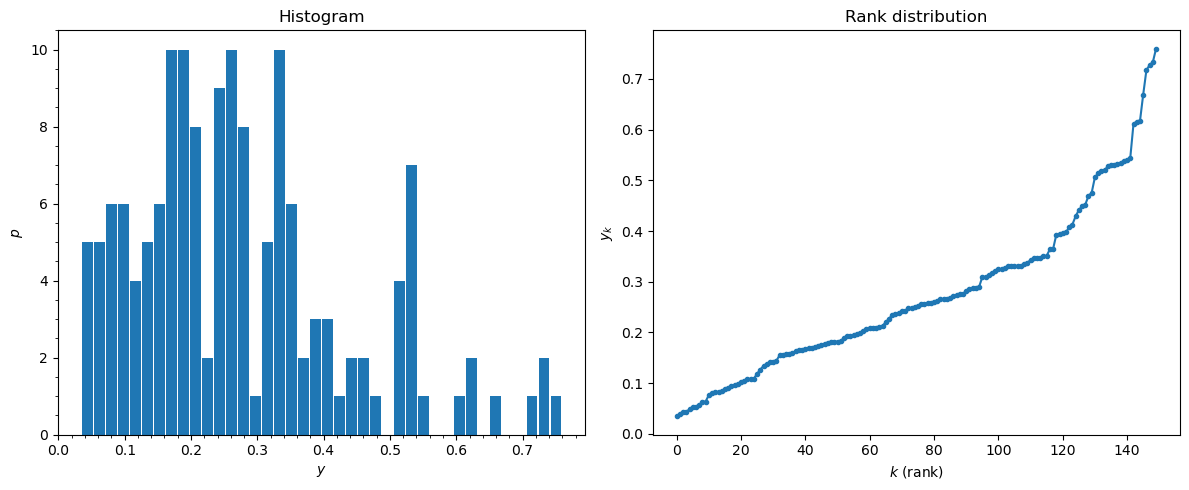

24.443855141039553 [ 0.608  0.761 -0.218 -0.062]


In [8]:
a2, L2 = pca.find_pc(X2)
U2 = pca.project_line(X2, a2)
Ds_a2 = pca.distance_line(X2, a2)
plots.plot_hist_and_rank_distribution(Ds_a2)
print(L2, a2)

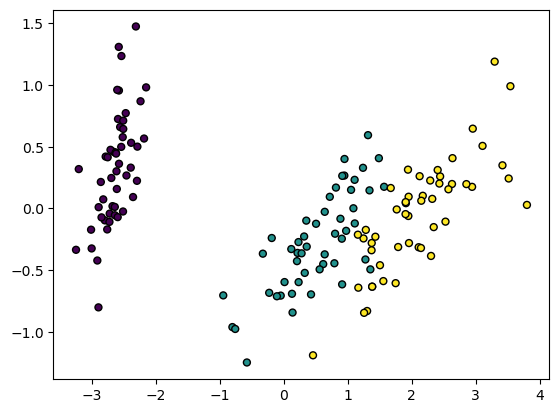

In [9]:
plt.scatter(U1, U2, c=Y0, edgecolors='k', s=25)
plt.show()

In [10]:
X0_t = utils.exclude_tail(Ds_c, X0, 8)
c_t = pca.location(X0_t)
print(c_t)

[5.784 3.049 3.677 1.174]


In [11]:
X1_t = X0 - c_t

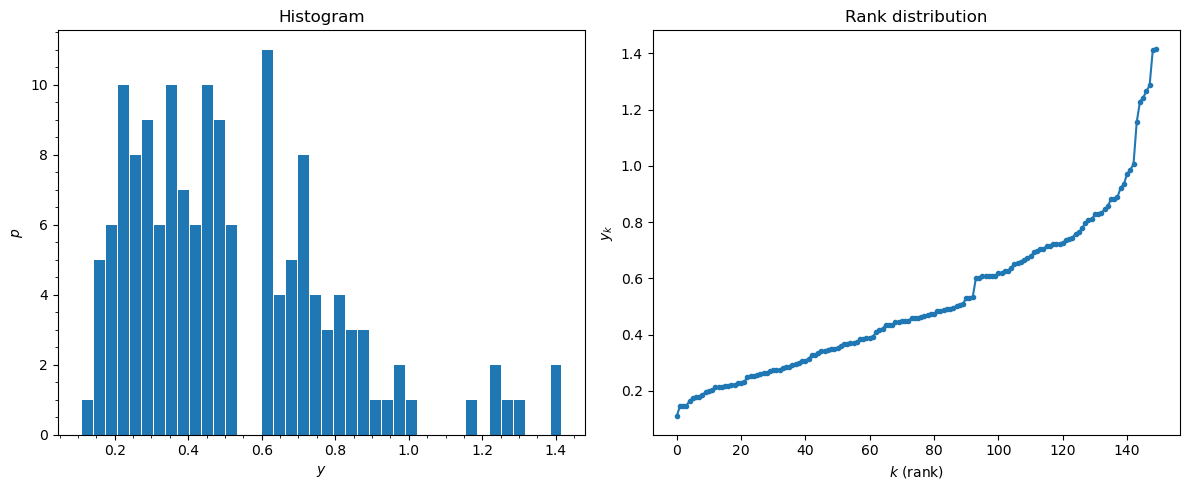

309.0875224769594 [ 0.360 -0.074  0.854  0.367]


In [12]:
a1_t, L1_t = pca.find_pc(X1_t)
U1_t = pca.project_line(X1_t, a1_t)
Ds_a1_t = pca.distance_line(X1_t, a1_t)
plots.plot_hist_and_rank_distribution(Ds_a1_t)
print(L1_t, a1_t)

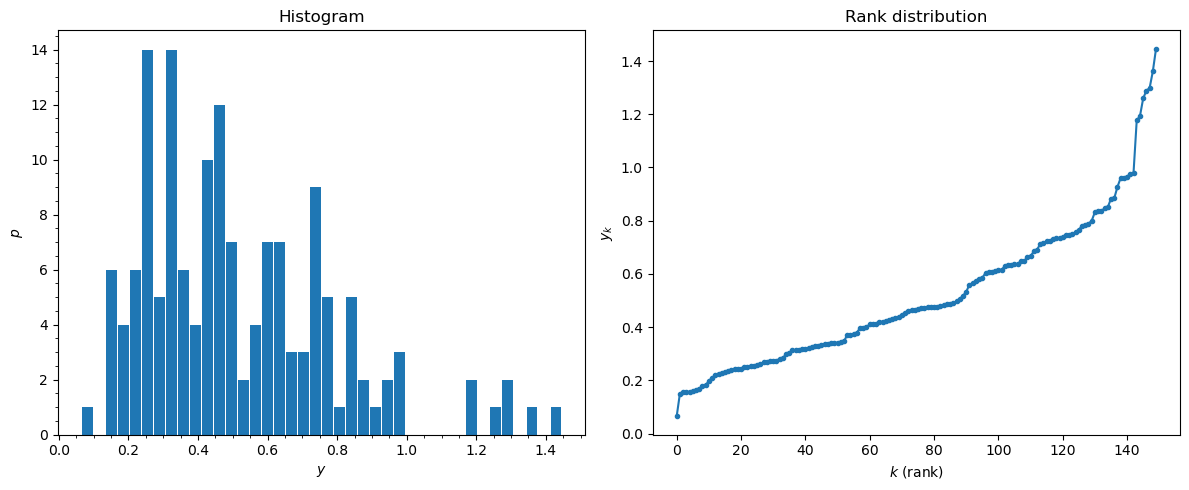

354.2026455696859 [ 0.378 -0.069  0.849  0.363]


In [13]:
X1_tt = utils.exclude_tail(Ds_a1_t, X1_t, 7)
a1_tt, L1_tt = pca.find_pc(X1_tt)
U1_tt = pca.project_line(X1_t, a1_tt)
Ds_a1_tt = pca.distance_line(X1_t, a1_tt)
plots.plot_hist_and_rank_distribution(Ds_a1_tt)
print(L1_tt, a1_tt)

In [14]:
X2_t = pca.project(X1_t, a1_tt)

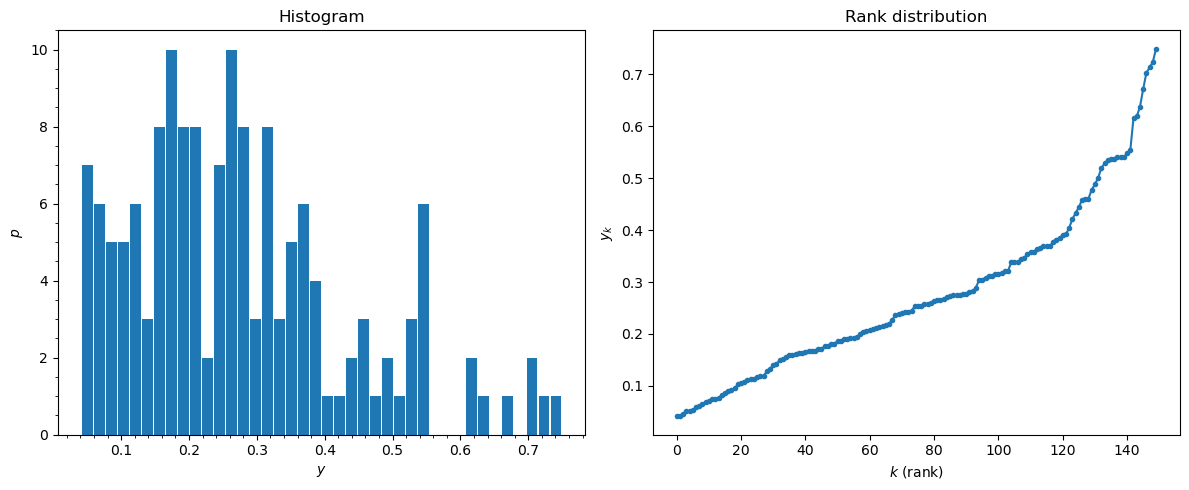

28.85889050254341 [ 0.612  0.766 -0.193 -0.042]


In [15]:
a2_t, L2_t = pca.find_pc(X2_t)
U2_t = pca.project_line(X2_t, a2_t)
Ds_a2_t = pca.distance_line(X2_t, a2_t)
plots.plot_hist_and_rank_distribution(Ds_a2_t)
print(L2_t, a2_t)

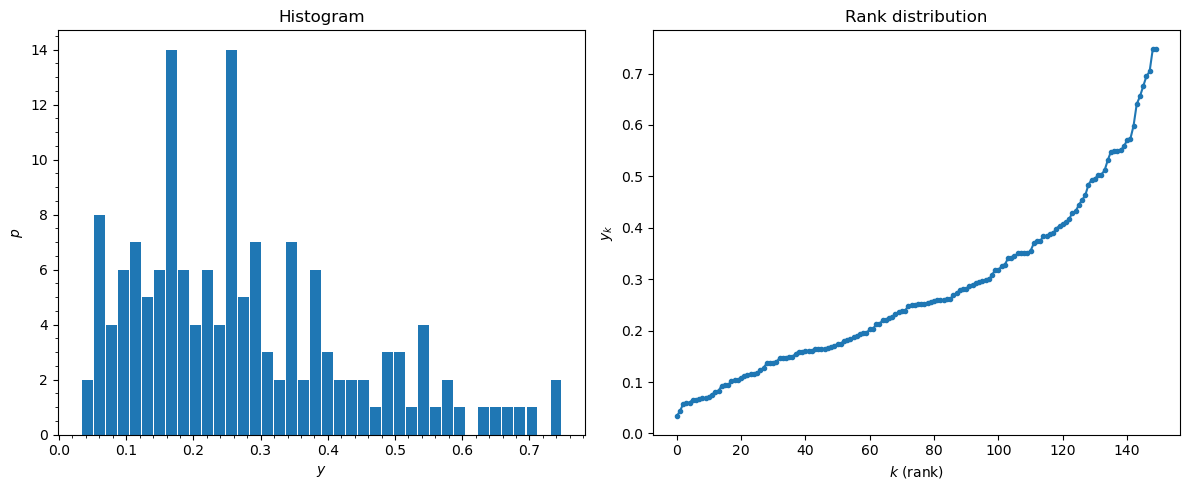

3.227771504192455 [ 0.579  0.793 -0.189 -0.010]


In [16]:
X2_tt = utils.exclude_tail(Ds_a2_t, X2_t, 7)
a2_tt, L2_tt = pca.find_pc(X2_tt)
U2_tt = pca.project_line(X2_t, a2_tt)
Ds_a2_tt = pca.distance_line(X2_t, a2_tt)
plots.plot_hist_and_rank_distribution(Ds_a2_tt)
print(L2_tt, a2_tt)

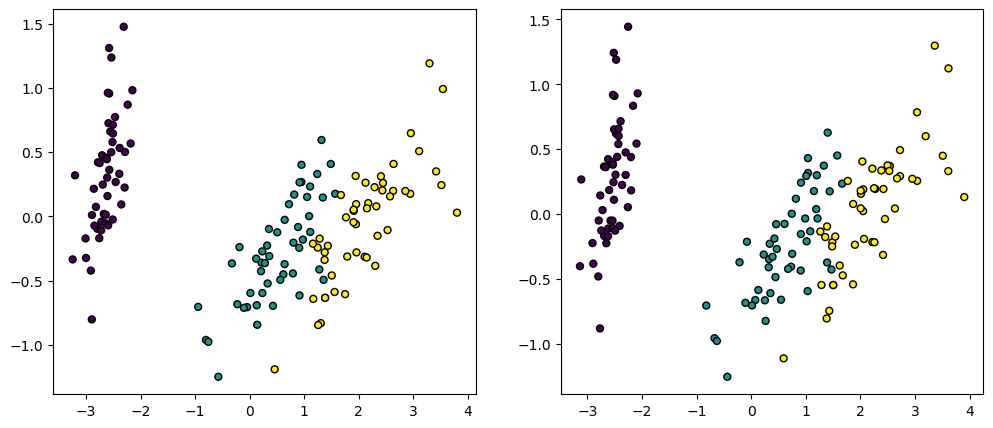

In [17]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(U1, U2, c=Y0, edgecolors='k', s=25)
plt.subplot(1,2,2)
plt.scatter(U1_tt, U2_tt, c=Y0, edgecolors='k', s=25)
plt.show()

In [21]:
N = len(X0)
alpha = (N - 8) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=funcs.QuantileFunc(alpha, funcs.SoftAbs_Sqrt(0.1)))
c = pca.find_rob_center(X0, wma)
plt.plot(sorted(pca.distance_center(X0, c)), marker='s', markersize=3)
plt.show()
print(c)

0.9466666666666667


AttributeError: module 'mlgrad.pca' has no attribute 'find_rob_center'

In [ ]:
D0 = pca.distance_center(X0, c0)
D1 = pca.distance_center(X0, c)
plt.scatter(D0, D1)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [ ]:
X1 = X0 - c
X1_0 = X0 - c0

In [ ]:
a1_0, L1_0 = pca.find_pc(X1_0)
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=4)
plt.show()
print(L1_0, a1_0)

In [ ]:
N = len(X0)
alpha = (N - 12) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.001), alpha=alpha)
a1, L1 = pca.find_rob_pc(X1, wma)
plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4)
plt.show()
print(L1, a1)
U1 = pca.project_line(X1, a1)
U1_0 = pca.project_line(X1_0, a1_0)

In [ ]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [ ]:
X2 = pca.project(X1, a1)
X2_0 = pca.project(X1_0, a1_0)

In [ ]:
a2_0, L2_0 = pca.find_pc(X2)
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='o', markersize=4)
plt.show()
print(L2_0, a2_0)

In [ ]:
N = len(X0)
alpha = (N - 10) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.01), alpha=alpha)
a2, L2 = pca.find_rob_pc(X2, wma)
plt.plot(sorted(pca.distance_line(X2, a2)), marker='o', markersize=3)
plt.show()
print(L2, a2)
U2 = pca.project_line(X2, a2)
U2_0 = pca.project_line(X2_0, a2_0)

In [ ]:
plt.scatter(pca.distance_line(X2_0, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [ ]:
X3 = pca.project(X2, a2)
X3_0 = pca.project(X2_0, a2_0)

In [ ]:
a3_0, L3_0 = pca.find_pc(X3)
plt.plot(sorted(pca.distance_line(X3_0, a3_0)), marker='o', markersize=4)
plt.show()
print(L3_0, a3_0)

In [ ]:
N = len(X0)
alpha = (N - 10) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.01), alpha=alpha)
a3, L3 = pca.find_rob_pc(X3, wma)
plt.plot(sorted(pca.distance_line(X3, a3)), marker='o', markersize=3)
plt.show()
print(L3, a3)
U3 = pca.project_line(X3, a3)
U3_0 = pca.project_line(X3_0, a3_0)

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(U1, U2, s=9, c=Y)
plt.subplot(1,2,2)
plt.scatter(U1_0, U2_0, s=9,c=Y)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(U2, U3, s=9, c=Y)
plt.subplot(1,2,2)
plt.scatter(U2_0, U3_0, s=9,c=Y)
plt.show()

In [ ]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [ ]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.01), alpha=0.88)
S = robust_scatter_matrix(X1, wma)
print(S)

In [ ]:
L, A = np.linalg.eig(S)
print(A)

In [ ]:
12 * 0.87